final project
===
due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 2: IQ and creativity

https://pubmed.ncbi.nlm.nih.gov/23825884/  
https://osf.io/hzpgy/

### Description

The relationship between intelligence and creativity: New support for the threshold hypothesis by means of empirical breakpoint detection 

#### Abstract

The relationship between intelligence and creativity has been subject to empirical research for decades. Nevertheless, there is yet no consensus on how these constructs are related. One of the most prominent notions concerning the interplay between intelligence and creativity is the threshold hypothesis, which assumes that above-average intelligence represents a necessary condition for high-level creativity. While earlier research mostly supported the threshold hypothesis, it has come under fire in recent investigations. The threshold hypothesis is commonly investigated by splitting a sample at a given threshold (e.g., at 120 IQ points) and estimating separate correlations for lower and upper IQ ranges. However, there is no compelling reason why the threshold should be fixed at an IQ of 120, and to date, no attempts have been made to detect the threshold empirically. Therefore, this study examined the relationship between intelligence and different indicators of creative potential and of creative achievement by means of segmented regression analysis in a sample of 297 participants. Segmented regression allows for the detection of a threshold in continuous data by means of iterative computational algorithms. We found thresholds only for measures of creative potential but not for creative achievement. For the former the thresholds varied as a function of criteria: When investigating a liberal criterion of ideational originality (i.e., two original ideas), a threshold was detected at around 100 IQ points. In contrast, a threshold of 120 IQ points emerged when the criterion was more demanding (i.e., many original ideas). Moreover, an IQ of around 85 IQ points was found to form the threshold for a purely quantitative measure of creative potential (i.e., ideational fluency). These results confirm the threshold hypothesis for qualitative indicators of creative potential and may explain some of the observed discrepancies in previous research. In addition, we obtained evidence that once the intelligence threshold is met, personality factors become more predictive for creativity. On the contrary, no threshold was found for creative achievement, i.e. creative achievement benefits from higher intelligence even at fairly high levels of intellectual ability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("data/final_data/fromjauketal2013.csv")
df = df.dropna(how="any") # drop observations with missing values in any of the columns
df = df.rename(columns={"CP_avgOriginality":"CP"}) # for easier handling
df["CP_x_CA"] = df["CP"] * df["CA"] # adding interaction

## Data exploration

In [2]:
df.head()

,IQ,CP,CA,CP_x_CA
0,124.571647,1.747612,110.0,192.237269
1,111.313106,1.916540,64.0,122.658586
2,115.698623,1.837332,52.0,95.541246
3,111.976033,1.879630,6.0,11.277778
4,112.078021,1.773148,40.0,70.925926


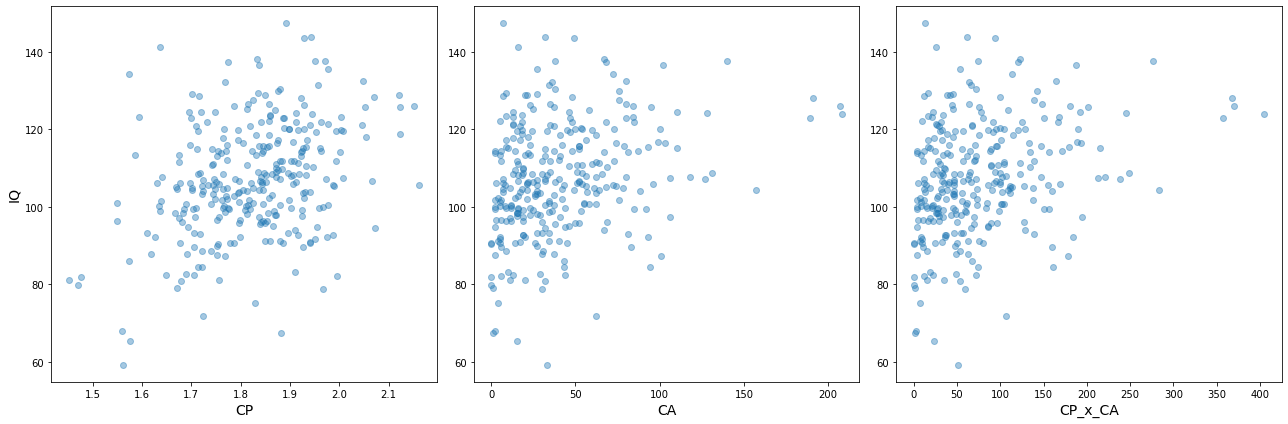

In [3]:
y_name = "IQ"
x_names = list(df.drop([y_name], axis = 1))

plt.subplots(1, 3, figsize = (18, 6))

for i, x_name in enumerate(x_names):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x = df[x_name], y = df[y_name], alpha = 0.4)
    plt.xlabel(x_name, fontsize=14)
    if i == 0:
        plt.ylabel(y_name, fontsize=14)
plt.tight_layout()

C:\tools\miniconda3\envs\ml\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


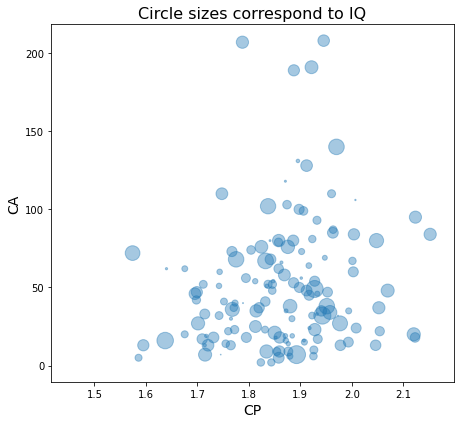

In [4]:
plt.figure(figsize=(6.5, 6))
plt.scatter(x = df[x_names[0]], y = df[x_names[1]], alpha = 0.4, s=8*(df[y_name]-df[y_name].mean()))
plt.xlabel(x_names[0], fontsize=14)
plt.ylabel(x_names[1], fontsize=14)
plt.title("Circle sizes correspond to IQ", fontsize=16)
plt.tight_layout()

In [5]:
corr_Xy = df.corr()[[y_name]].sort_values(y_name).drop(y_name,axis = 0)
corr_Xy

,IQ
CA,0.281401
CP_x_CA,0.298401
CP,0.352167


## Linear Regression

### Adding 1st predictor: **CP**

intercept:     29.894
coefficients: [42.406]
R²:            0.124
p:                         



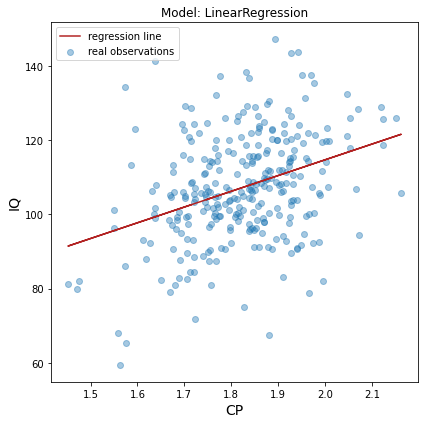

In [6]:
x_name = "CP"
X = df[[x_name]].values
y = df[["IQ"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")
print()

# for regression line plot
y_pred = linreg.predict(X)

# plot
plt.figure(figsize=(6, 6))
plt.plot(X, y_pred, c = "firebrick", label = "regression line")
plt.scatter(X, y, alpha = 0.4, label = "real observations")
plt.ylabel(y_name, fontsize=14)
plt.xlabel(x_name, fontsize=14)
plt.title("Model: " + str(linreg)[:-2])
plt.legend()
plt.tight_layout();

### Adding 2nd predictor: **CA**

In [7]:
X = df[["CP", "CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")

intercept:     36.156
coefficients: [36.951  0.09 ]
R²:            0.169
p:                         


### Adding 3rd predictor: **Interaction CP*CA**

In [8]:
X = df[["CP", "CA", "CP_x_CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")

intercept:     32.840
coefficients: [38.757  0.187 -0.052]
R²:            0.169
p:                         


### Sequence of predictor inclusion by correlation

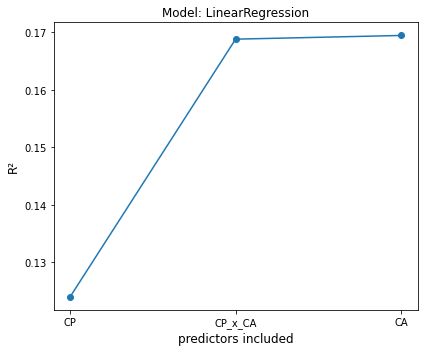

In [9]:
corr_Xy_abs = corr_Xy.abs().sort_values(y_name, ascending=False)
x_names_corr = list(corr_Xy_abs.T)

scores = []

for i, x_name in enumerate(x_names_corr):

    reg = LinearRegression()
    reg.fit(df[x_names_corr[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names_corr[:i + 1]], df[y_name]))

plt.figure(figsize=(6, 5))
plt.plot(x_names_corr, scores, marker = "o")
#plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictors included", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.title("Model: " + str(reg)[:-2])
#plt.grid()
plt.tight_layout();

<div class="alert alert-warning">Notes:
    <ul>
    <li> Inclusion of interaction does not seem to add anything to the model, but Interaction has higher correlation with outcome than CA. Would a model with predictors CP and interaction (and without CA) make sense? Or should the interaction always be included in the end after the main effects?</li>
    <li>p-values still missing.</li>
    <li>Confidence intervals still missing (Bootstrap?).</li>
    </ul></div>

## Machine learning methods

* Interaction variable removed
* model is not fitted on the entire data set (fit on training data, predictions on test data)
* 2 methods are used: Regularized linear regression (Elastic Net) and Random Forests
* Cross validation implemented: outer loop to prevent over-fitting, inner loop for hyperparameter tuning

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV


# cross validation constants
N_OUTER_SPLITS = 20
N_INNER_SPLITS = 50


# train test split function
def split_train_test(data, i_train, i_test):
    train = data.iloc[i_train, :]
    test = data.iloc[i_test, :]
    return train, test


# prepare data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df[df.columns.drop(["CP_x_CA", y_name])]), columns=df.columns.drop(["CP_x_CA", y_name]))
y = df[[y_name]]

### Elastic Net

In [12]:
from sklearn.linear_model import ElasticNet
from scipy.stats import loguniform, uniform
import warnings

warnings.filterwarnings("ignore")

reg = ElasticNet()

hyper_space = {
    "alpha": loguniform(1e-4,1e3),
    "l1_ratio": uniform(1e-3,1.0)
    }

outer_cv = ShuffleSplit(n_splits=N_OUTER_SPLITS, test_size=0.2)    

best_model = None
best_score = None

# iterate over outer CV splitter
for i_cv, (i_train, i_test) in enumerate(outer_cv.split(X, y), start=1):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    # nested CV with parameter optimization
    inner_cv = ShuffleSplit(n_splits=N_INNER_SPLITS,
                                 test_size=0.2)   
    search_reg = RandomizedSearchCV(
        estimator=reg,
        param_distributions=hyper_space,
        n_iter=1000,
        cv=inner_cv,
        n_jobs=-2,
    )

    result = search_reg.fit(X_train, y_train.values.ravel())
    score = result.score(X_test, y_test)

    print(f"Epoch {str(i_cv).rjust(2)}/{N_OUTER_SPLITS}:", f"R² = {score: ,.4f}, Model =", result.best_estimator_)
    
    if best_model == None:
        best_model = result.best_estimator_
        best_score = score
    else:
        if (score > best_score) | (best_model == None):
            best_model = result.best_estimator_
            best_score = score       

print(50*"-")
print("Best model: ", f"R² = {best_score: ,.4f}, Model =", best_model)

Split  1: R² =  0.1552, Model = ElasticNet(alpha=0.12830833224242436, l1_ratio=0.002931028103690835)
Split  2: R² =  0.1187, Model = ElasticNet(alpha=0.08203415475030484, l1_ratio=0.06815337425129053)
Split  3: R² =  0.0825, Model = ElasticNet(alpha=0.11000183434695253, l1_ratio=0.0027719706386125633)
Split  4: R² =  0.0573, Model = ElasticNet(alpha=0.051999123351481845, l1_ratio=0.011466692205479467)
Split  5: R² =  0.1103, Model = ElasticNet(alpha=0.15766644466960358, l1_ratio=0.06819931565750259)
Split  6: R² =  0.1609, Model = ElasticNet(alpha=0.18018186469736194, l1_ratio=0.06687079670246798)
Split  7: R² =  0.1907, Model = ElasticNet(alpha=0.16128530563459037, l1_ratio=0.012857986426738077)
Split  8: R² =  0.0542, Model = ElasticNet(alpha=0.11010042828850625, l1_ratio=0.080354323880518)
Split  9: R² =  0.1611, Model = ElasticNet(alpha=0.04677364715475518, l1_ratio=0.036805151286978144)
Split 10: R² = -0.0500, Model = ElasticNet(alpha=0.05184962716288858, l1_ratio=0.03866378318831

In [13]:
res = best_model.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_, 3))
print(f"R²:           {score: ,.3f}")

intercept:     107.214
coefficients: [3.969 2.863]
R²:            0.167


Classic linear regression gave us:

    intercept:     36.156
    coefficients: [36.951  0.09 ]
    R²:            0.169

<div class="alert alert-info"><ul>
    <li>First we trained a model on the training data, the R² scores were showing us how good the predictions were on the test data.</li>
        <li>Then for comparison with classic linear regression we fit the best model on the entire data and compute R² and coefficients</li>
    </ul></div>

### Random forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from skopt.space import Integer, Real

reg = RandomForestRegressor( n_estimators=256, random_state = 0)

hyper_space = {
    'max_features': Real(1e-2,1e0,prior="uniform"),
    'min_samples_split': Integer(2,256,prior="log-uniform"),
    'min_samples_leaf': Integer(1,256,prior="log-uniform"),
}

outer_cv = ShuffleSplit(n_splits=N_OUTER_SPLITS, test_size=0.2)    

best_model = None
best_score = None

# iterate over outer CV splitter
for i_cv, (i_train, i_test) in enumerate(outer_cv.split(X, y), start=1):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    # nested CV with parameter optimization
    inner_cv = ShuffleSplit(n_splits=N_INNER_SPLITS,
                                 test_size=0.2)   
    search_reg = RandomizedSearchCV(
        estimator=reg,
        param_distributions=hyper_space,
        n_iter=1000,
        cv=inner_cv,
        n_jobs=-2,
    )

    result = search_reg.fit(X_train, y_train.values.ravel())
    score = result.score(X_test, y_test)

    print(f"Epoch {str(i_cv).rjust(2)}/{N_OUTER_SPLITS}:", f"R² = {score: ,.4f}, Model =", result.best_estimator_)
    
    if best_model == None:
        best_model = result.best_estimator_
        best_score = score
    else:
        if (score > best_score) | (best_model == None):
            best_model = result.best_estimator_
            best_score = score       

print(50*"-")
print("Best model: ", f"R² = {best_score: ,.4f}, Model =", best_model)

## Bayesian regression

In [1]:
#%matplotlib inline
from warnings import filterwarnings
#import os

filterwarnings("ignore")
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
#os.environ['THEANO_FLAGS'] = 'device=cpu'

#import numpy as np
#import pandas as pd
#import pymc3 as pm
#import seaborn as sns
#import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Start with an example
#### Create random data

In [43]:
np.random.seed(0)

X = np.random.randn(300, 1)
x = X.ravel()
noise = 5 * np.random.randn(300, 1)
slope = 4
intercept = 3
y = slope * X + intercept + noise
y = np.squeeze(y)

#### Fit classic linear regression model

intercept:     2.309
coefficients:  4.153
R²:            0.409
p:                         



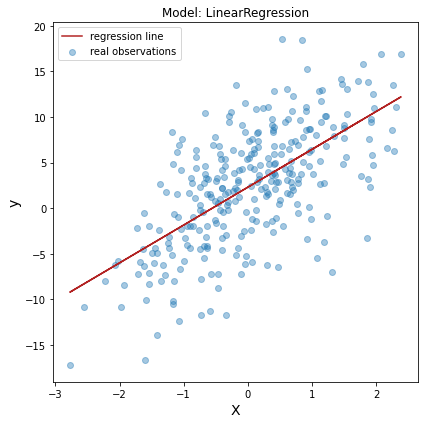

In [45]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_: ,.3f}")
print("coefficients: ", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")
print()

# for regression line plot
y_pred = linreg.predict(X)

# plot
plt.figure(figsize=(6, 6))
plt.plot(X, y_pred, c = "firebrick", label = "regression line")
plt.scatter(X, y, alpha = 0.4, label = "real observations")
plt.ylabel("y", fontsize=14)
plt.xlabel("X", fontsize=14)
plt.title("Model: " + str(linreg)[:-2])
plt.legend()
plt.tight_layout();

#### Regression with PyMC3

We can program the model described before the following way and plot the posterior distributions.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


array([<AxesSubplot:title={'center':'slope'}>,
       <AxesSubplot:title={'center':'intercept'}>,
       <AxesSubplot:title={'center':'error'}>], dtype=object)

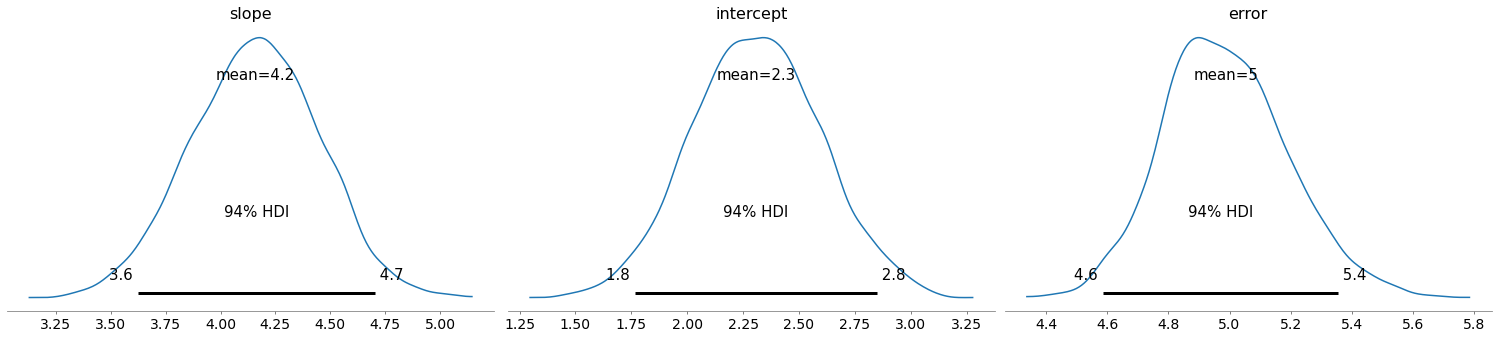

In [46]:
import pymc3 as pm
import arviz as az

with pm.Model() as model:
    # define priors
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predictions
    obs = pm.Normal('observation', a*x + b, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample(return_inferencedata=True)
    
az.plot_posterior(trace)

We can see that the model comes to the same conclusion as the standard linear regression: A slope of around 3.2 and an intercept of around 2.2. We even see that the standard error is about 1.1. But here, we also get credible intervals for free!

Looking at these figures, it seems like the model is still unsure about the parameters. Look at the slope, for example. With a probability of 94%, the slope a is between 2.7 and 3.7, which is still a rather wide interval. The same goes for the other parameters we estimated.

*The great thing about Bayesian reasoning: All of these distributions narrow down further, i.e. the model gets more certain the more data we provide.*

This is all good, but the goal was not to estimate the model’s parameters. Don’t get me wrong, it’s nice to have them, but actually, we are interested in getting predictions for new values of x.

##### **Predictions**

Unfortunately, this is not as straightforward as in scikit-learns fit-predict paradigm. It’s still easy, and you can create a model with changeable inputs as follows:

In [47]:
with pm.Model() as predictive_model:
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    x_ = pm.Data('features', x) # a data container, can be changed
    
    obs = pm.Normal('observation', a*x_ + b, s, observed=y)
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


I have marked the changes for you in bold. It’s basically telling the model to use a placeholder x_ which was initially filled with our training data x. We then train the model, i.e. get posterior distributions for all of the parameters. We can pass the model new data via

In [50]:
x_new = np.linspace(-3, 3, 50) # 50 input values between -3 and 3

with predictive_model:
    pm.set_data({'features': x_new})
    posterior = pm.sample_posterior_predictive(trace)

This is basically all you have to do! To have a better understanding, let us check what’s inside posterior : It’s a dictionary that contains the new observations. Let’s grab them and store them as y_pred .

In [51]:
y_pred = posterior['observation']

The variable y_pred is a numpy array containing 4000 observations for each of the 50 inputs in x_new , hence its dimensions are 4000x50. You can also inspect this via y_pred.shape . You can visualize this array as:

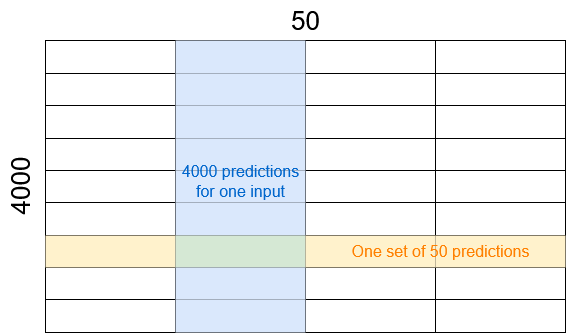

For example, y_pred[:, 0] gives us 50 predictions, one for each entry in x_new , while y_pred[0, :] gives us 4000 predictions for the first element in x_new , namely -3.

Using this table, we can get the mean and the standard deviation across the 4000 samples for each of the 50 new inputs and visualize the result.

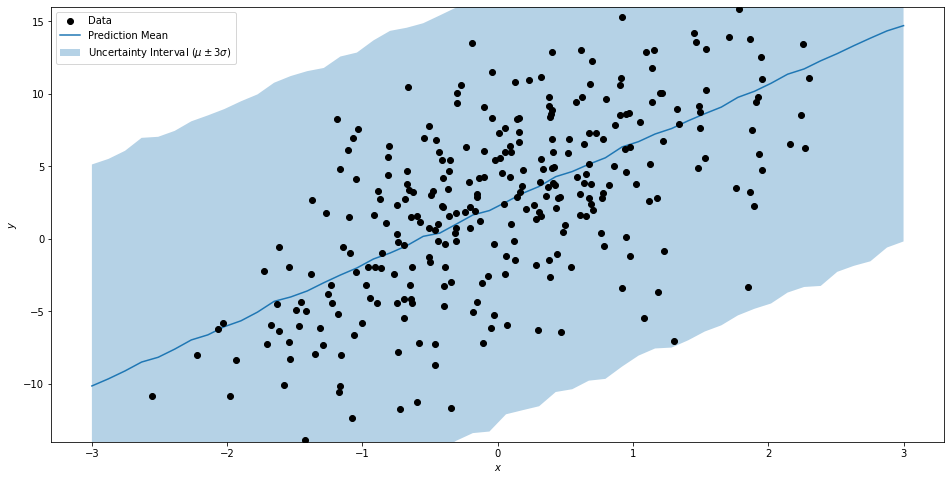

In [53]:
y_mean = y_pred.mean(axis=0)
y_std = y_pred.std(axis=0)

plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='k', zorder=10, label='Data')
plt.plot(x_new, y_mean, label='Prediction Mean')
plt.fill_between(x_new, y_mean - 3*y_std, y_mean + 3*y_std, alpha=0.33, label='Uncertainty Interval ($\mu\pm3\sigma$)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-14, 16)
plt.legend(loc='upper left')

Nice, right? That’s just what we wanted! However, it feels like a bit much code, right? Especially if we merely want to do a really simple Bayesian linear regression and nothing fancy. Let’s see how we can achieve the same results faster.

##### **The GLM Submodule**

Similar to the R syntax, you rewrite our first simple model as

In [54]:
with pm.Model() as simpler_model:
    pm.glm.GLM.from_formula('y ~ x', dict(x=x, y=y))
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


This is a nice feature you should know! Another great property about this submodule is that it integrates with pandas data frames very well. And you can even specify priors if you don’t like the defaults (normal for all coefficients, half-Cauchy for the error as far as I know). Take a look at the following code:

In [55]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

my_priors = {
    'Intercept': pm.Cauchy.dist(0, 10),
    'x': pm.Cauchy.dist(0, 10)
}

with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', df, priors=my_priors)
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


##### **Conclusion and Outlook**

In this article, you have learned the difference between regular linear regression and its Bayesian counterpart. Linear regression models output single values as predictions, while Bayesian linear regression models can output distributions as predictions.

This has the advantage that we can quantify the uncertainty for our predictions, and be careful when the prediction interval is too large. In our example, we could see that the slope is clearly positive. Maybe it is not 3.2, but with high probability, it is between 1.7 and 3.7. In fact, I used 3 as a slope and 2 as an intercept. So, if it is better to underestimate the true y, let us use 1.7 as the slope. If overestimating is better, we could use 2.7.

We have used PyMC3 to implement Bayesian linear regression for one variable. Of course, you can add as many variables as you wish (and your machine can handle). You just have to declare more variables. Either explicitly like

```python
    a = pm.Normal('slope', 0, 16)
    a2 = pm.Normal('slope2', 0, 16)
    a3 = pm.Normal('slope3', 0, 16)
```

or more compact and scalable as

```python
    a = pm.Normal('slopes', 0, 16, shape=3)
```

Now, you should try it out on your own! It’s fun to play around with, especially if you leave the path of very simple models. You can use different distributions than the normal distribution for y, for example, the Student’s t-distribution or the Cauchy distribution.

The tails of these two distributions are wider than the ones of the normal distribution. This has the effect that outliers don’t surprise, and hence influence the model as much as in the case of the normal distribution.

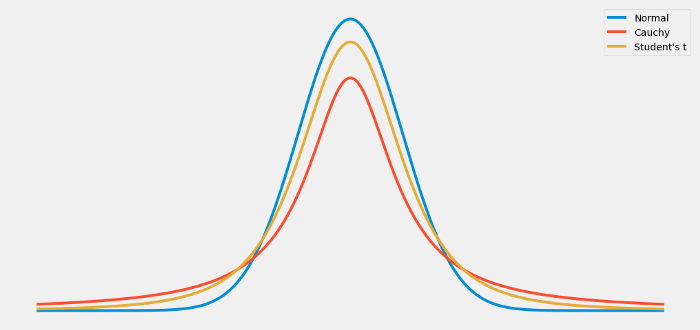
3 different distributions. Note that the normal distribution has the highest peak, but flattens rapidly towards the edges. Image by Author

Maybe we don’t want to predict continuous values at all but counts instead. In this case, we could use the Poisson distribution via

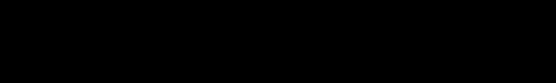

You can do it manually, or provide a family argument to the glm submodule, as in

```python
with pm.Model() as model:
    pm.glm.GLM.from_formula('y~x', df, family=pm.families.Poisson())
    
    trace = pm.sample()
```

However you do it, the possibilities are endless. Check your data, think about which distribution makes sense, or just test a lot of different distributions in the worst case! You can even create more complex models, such as Bayesian neural networks if you want. Just start with your own projects, and you will get more experience with this whole topic and become a Bayesian Master.